In [ ]:
#!pip install pandas matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

------------------------------------------------------------------------------------------------------------------------------

In [21]:
df1 = pd.read_csv("most_problematic_Street_by_district.csv", dtype={'District': str}, header=None, names=['District', "Street", 'Cantidad'])

In [22]:
df1= df1.dropna()

Con este dataframe, queremos estudiar la calle que ha causado más problemas a un

In [23]:
df1 = df1[df1['District'].str.startswith('0')]
print(df1)

   District         Street  Cantidad
1       001       STATE ST     71387
2       002      DR MARTIN     21219
3       003      DR MARTIN     26086
4       004   STONY ISLAND     16318
5       005   MICHIGAN AVE     21819
6       006        79TH ST     27057
7       007    ASHLAND AVE     22625
8       008     CICERO AVE     24806
9       009    ASHLAND AVE     15187
10      010      CERMAK RD     18214
11      011     MADISON ST     27562
12      012     MADISON ST     16252
13      014  MILWAUKEE AVE     23478
14      015     MADISON ST     20048
15      016       OHARE ST     20134
16      017    IRVING PARK     12118
17      018   MICHIGAN AVE     27023
18      019       CLARK ST     22895
19      020    SHERIDAN RD     12206
20      021    INDIANA AVE         4
21      022     HALSTED ST     16204
22      024    SHERIDAN RD     15127
23      025      NORTH AVE     31783
24      031       OHARE ST        60


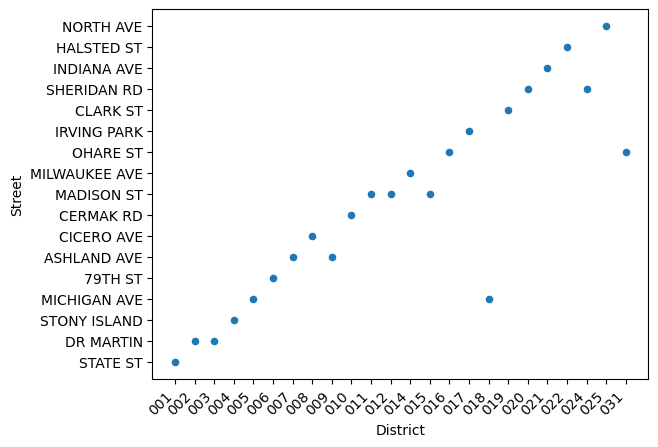

In [13]:
df1.plot(kind="scatter", x="District", y="Street" )
plt.xticks(rotation=45, ha='right')
plt.show()

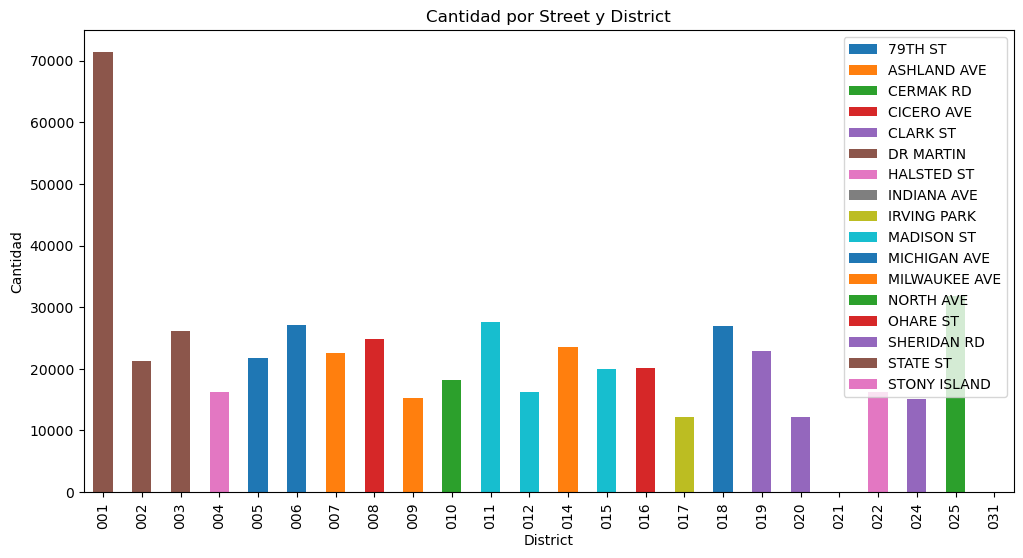

In [26]:
# Pivota el DataFrame
pivot_df = df1.pivot(index='District', columns='Street', values='Cantidad')

# Crea la gráfica de barras apiladas
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))

# Mueve la leyenda a la parte superior derecha
ax.legend(loc='upper right')

# Configura etiquetas y título
plt.xlabel('Comisaría')
plt.ylabel('Cantidad')
plt.title('Cantidad por Calle y Comisaria')

# Muestra la gráfica
plt.show()


In [16]:
street_counts = df1['Street'].value_counts()
street_counts.head()

MADISON ST      3
OHARE ST        2
MICHIGAN AVE    2
ASHLAND AVE     2
SHERIDAN RD     2
Name: Street, dtype: int64

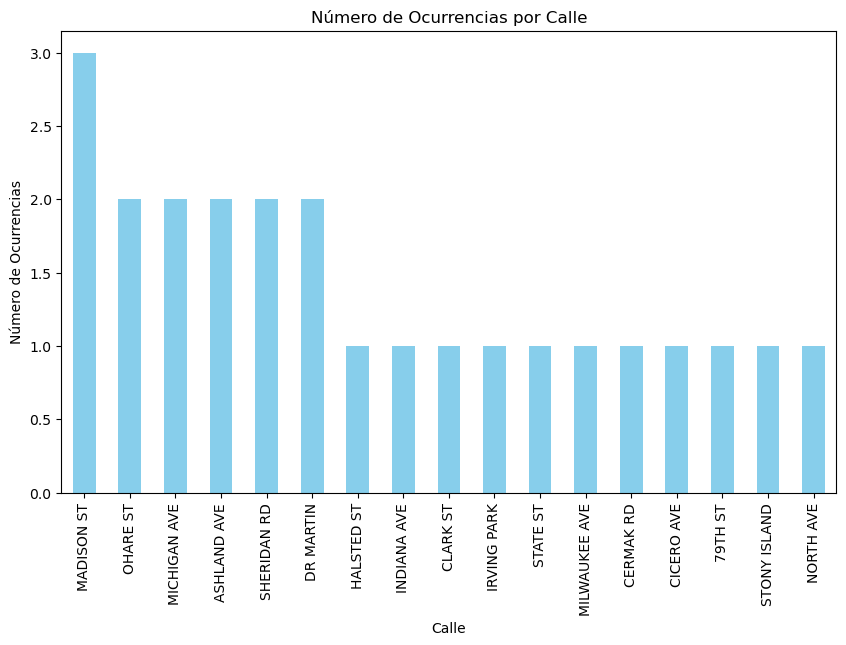

In [15]:
# Crear la gráfica de barras
street_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Configurar el título y las etiquetas
plt.title('Número de Ocurrencias por Calle')
plt.xlabel('Calle')
plt.ylabel('Número de Ocurrencias')

# Mostrar la gráfica
plt.show()

Se puede apreciar que hay varias calles las cuales han sido atendidas por más de una comisaría. Si tratamos de comprender la razón de que haya calles reptidas podemos ver lo siguiente:

Centrandonos en las calles que aprecen en más una ocasión:

-Madison Street: Es una de las calles más largas de todo Chichago conectando el Este de la ciudad con el Oeste. En ella podemos encontrar el [United Center](UnitedCenter.jpg)(campo de baloncesto y hockey), el [Milennium Park](MillemiumPark.jpg) uno de los lugares más visitados de toda la ciudad debido a poseer el Pabellón Jay Pritzker, [Chase Tower](ChaseTower.jpg) un rascacielos de 60 pisos donde se encuentran las oficinas de algunas de las empresas más importantes de Chicago, [Civic Opera house](opera.jpg) la principal ópera de la cuidad entre otros muchos edificios, tanto de vivienda como comerciales.

-O'Hare Street: Con respecto a esta calle cabe destacar que es la calle en la que se encuentra el aeropuerto de Chicago y por lo tanto, uno de los puntos más transitados de toda la cuidad, ya que El [Aeropuerto Internacional de Chicago O'Hare](O'hareAirport.jpg) (IATA: ORD) es uno de los aeropuertos más transitados de Estados Unidos y del mundo, con varios vuelos nacionales, internacionales e intercontinentales. Durante el 2022, 68.3 millones de pasajeros pasaron por el aeropuerto.

Por lo tanto, podemos confirmar el pensamiento inicial que todos tenemos de que en lugares con grandes aglomeraciones de personas es donde más común es que se produzca un crimen, desde un simple robo de pertenencias o multas de tráfico, como otros más graves como consumo de drogas o agresiones. 

Hasta el momento solo hemos llevado a cabo un análisis general para obtener las calles en las que más crimenes se han llevado a cabo, agrupando por la comisaría que atendió la denuncia en dicha calle, pero si se quisiera llevar a cabo un análisis más profundo de en que calles se han producido delitos de un tipo durante cierto año, se puede consultar el script grep_steets que simula el comando grep y encuentra y devuelve las calles con más delitos de un determinado tipo en un año dado. 

Los siguientes resultados por ejmeplo nos muestran las calles en las que más robos se produjeron en 2023:

In [5]:
df_THEFT_2023 = pd.read_csv("grep_THEFT_2023.csv", header=None, names=["Street", 'Cantidad'])
print(df_THEFT_2023.head(10))

         Street  Cantidad
0      STATE ST      1261
1  MICHIGAN AVE      1236
2      CLARK ST       917
3    HALSTED ST       719
4   ASHLAND AVE       596
5      BROADWAY       530
6   WESTERN AVE       458
7    KEDZIE AVE       412
8    CICERO AVE       406
9    PULASKI RD       406


----------------------------------------------------------------------------------------------------------------------------